# Box Plots of Venue Categories

_Examine the amount of variation present in each feature across all stations_

### Import Libraries

In [1]:
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt # scripting interface
%matplotlib inline

mpl.style.use('ggplot') # ggplot-like style

import numpy as np # work with arrays
from sklearn import preprocessing # normalize dataset
from sklearn.preprocessing import RobustScaler # dealing with outliers

### Load Data

In [3]:
Stations_VenueCounts = pd.read_csv('Stations_VenueCounts.csv', index_col = 0)
print(Stations_VenueCounts.head())

            City   Latitude  Longitude  Arts & Entertainment  \
Bayview   Ottawa  45.409230 -75.722323                    10   
Blair     Ottawa  45.431026 -75.608416                     1   
Cyrville  Ottawa  45.422745 -75.626372                     2   
Hurdman   Ottawa  45.412357 -75.664320                     2   
Lees      Ottawa  45.416366 -75.670539                     3   

          College & University  Food  Nightlife Spot  Outdoors & Recreation  \
Bayview                      1    25              11                     10   
Blair                        1    26               1                      4   
Cyrville                     0     8               2                      2   
Hurdman                     11    15               3                     14   
Lees                        13    15               3                     11   

          Professional & Other Places  Shop & Service  Travel & Transport  \
Bayview                            42              51          

### Convert to Percentage


Convert to venue category count to percentage of total venues at each Station

In [5]:
data_000 = Stations_VenueCounts.iloc[:,3:11]

data_001 = data_000.div(data_000.sum(1), 0).round(2)
data_002 = data_001*100

data_002

,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport
Bayview,6.0,1.0,16.0,7.0,6.0,26.0,32.0,7.0
Blair,1.0,1.0,27.0,1.0,4.0,20.0,36.0,10.0
Cyrville,2.0,0.0,9.0,2.0,2.0,33.0,40.0,12.0
Hurdman,2.0,11.0,15.0,3.0,14.0,16.0,15.0,25.0
Lees,3.0,15.0,17.0,3.0,13.0,17.0,12.0,19.0
Lyon,1.0,2.0,14.0,2.0,4.0,47.0,12.0,16.0
Parliament,2.0,0.0,19.0,3.0,4.0,46.0,23.0,3.0
Pimisi,15.0,1.0,22.0,1.0,13.0,19.0,18.0,10.0
Rideau,2.0,1.0,16.0,6.0,28.0,12.0,30.0,5.0
St-Laurent,2.0,1.0,19.0,0.0,1.0,4.0,73.0,1.0


### Box Plots

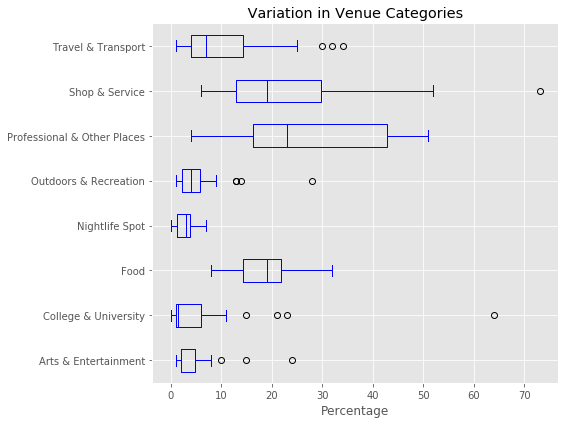

In [7]:
data_002.plot(kind = 'box',
              figsize=(8, 6),
              color = 'blue',
              vert = False # if you prefer horizontal
             )

plt.title(' Variation in Venue Categories ')
plt.xlabel('Percentage')

plt.tight_layout()

plt.savefig('Macumber_Coursera_Capstone_Figure01.png') # has to be before plt.show()

plt.show()

### Final Dataframe

In [14]:
Stations_VenueCounts_tomerge = Stations_VenueCounts[['City', 'Latitude', 'Longitude']]

Stations_VenueCounts_Percent = Stations_VenueCounts_tomerge.merge(data_002, left_index = True, right_index = True)

Stations_VenueCounts_Percent

,City,Latitude,Longitude,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport
Bayview,Ottawa,45.409230,-75.722323,6.0,1.0,16.0,7.0,6.0,26.0,32.0,7.0
Blair,Ottawa,45.431026,-75.608416,1.0,1.0,27.0,1.0,4.0,20.0,36.0,10.0
Cyrville,Ottawa,45.422745,-75.626372,2.0,0.0,9.0,2.0,2.0,33.0,40.0,12.0
Hurdman,Ottawa,45.412357,-75.664320,2.0,11.0,15.0,3.0,14.0,16.0,15.0,25.0
Lees,Ottawa,45.416366,-75.670539,3.0,15.0,17.0,3.0,13.0,17.0,12.0,19.0
Lyon,Ottawa,45.418518,-75.705015,1.0,2.0,14.0,2.0,4.0,47.0,12.0,16.0
Parliament,Ottawa,45.421389,-75.698889,2.0,0.0,19.0,3.0,4.0,46.0,23.0,3.0
Pimisi,Ottawa,45.413592,-75.713726,15.0,1.0,22.0,1.0,13.0,19.0,18.0,10.0
Rideau,Ottawa,45.152272,-75.650269,2.0,1.0,16.0,6.0,28.0,12.0,30.0,5.0
St-Laurent,Ottawa,45.420605,-75.638188,2.0,1.0,19.0,0.0,1.0,4.0,73.0,1.0


### Export the file

In [15]:
Stations_VenueCounts_Percent.to_csv('Stations_VenueCounts_Percent.csv')